# Embedding a 2D Circle with t-SNE
following the paper "Initialization is critical for preserving global data
structure in both t-SNE and UMAP" by Kobak and Lindermann

In [1]:
%matplotlib inline 

import numpy as np
import pylab as plt
import seaborn as sns
sns.set_theme(context='paper', style='ticks', font='Arial')

from openTSNE import TSNE

import openTSNE
print('openTSNE', openTSNE.__version__)

openTSNE 1.0.2


## t-SNE on a circle

In [2]:
# Generate the data

n = 7000
np.random.seed(42)
X = np.random.randn(n,3) / 1000
X[:,0] += np.cos(np.arange(n)*2*np.pi/n)
X[:,1] += np.sin(np.arange(n)*2*np.pi/n)

In [3]:
%%time

# BH is faster for this sample size
Z1 = TSNE(n_jobs=-1, n_iter=1000, initialization='random', random_state=42, negative_gradient_method='bh', verbose=True).fit(X)
Z2 = TSNE(n_jobs=-1,n_iter=1000, negative_gradient_method='bh', verbose=True).fit(X)

CPU times: user 8min 57s, sys: 9.04 s, total: 9min 6s
Wall time: 9min 47s


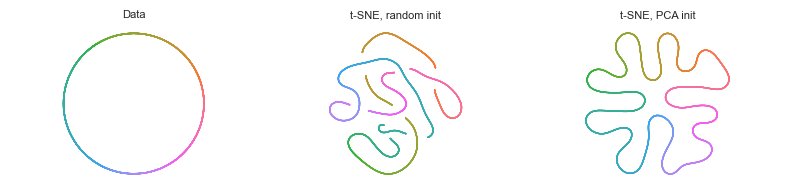

In [5]:

from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(n))

titles = ['Data', 't-SNE, random init', 't-SNE, PCA init']

plt.figure(figsize=(8,2))

for i,Z in enumerate([X,Z1,Z2],1):
    plt.subplot(1,3,i)
    plt.gca().set_aspect('equal', adjustable='datalim')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=np.arange(n), cmap=cmap, 
                edgecolor='none', rasterized=True)
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i-1], fontsize=8)
    
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()
# plt.savefig('tsne-circle.png', dpi=300)
# plt.savefig('tsne-umap-circle.pdf', dpi=300)

## trying the same on an equilateral triangle

In [3]:
# Define equilateral triangle vertices
v1 = np.array([0, 0])
v2 = np.array([1, 0])
v3 = np.array([0.5, np.sqrt(3) / 2])

# Parametric representation of the triangle perimeter
t = np.linspace(0, 1, n, endpoint=False)  # Parameter along the perimeter

# Determine which edge each point belongs to
edge = (t * 3).astype(int)  # 3 edges

# Interpolate along edges
X_trig = np.zeros((n, 2))
X_trig[edge == 0] = np.outer(t[edge == 0] * 3, v2 - v1) + v1  # Bottom edge
X_trig[edge == 1] = np.outer((t[edge == 1] - 1/3) * 3, v3 - v2) + v2  # Right edge
X_trig[edge == 2] = np.outer((t[edge == 2] - 2/3) * 3, v1 - v3) + v3  # Left edge

# Add small Gaussian noise
X_trig += np.random.randn(n, 2) / 1000

In [4]:

# BH is faster for this sample size
Z0_trig = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh', verbose=True).fit(X_trig)
Z1_trig = TSNE(n_jobs=-1, initialization='random', random_state=12, negative_gradient_method='bh', verbose=True).fit(X_trig)
Z2_trig = TSNE(n_jobs=-1, random_state=42, negative_gradient_method='bh', verbose=True).fit(X_trig)
Z3_trig = TSNE(n_jobs=-1, random_state=12, negative_gradient_method='bh', verbose=True).fit(X_trig)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, initialization='random', n_jobs=-1,
     negative_gradient_method='bh', random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 4.54 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.46 seconds
===> Running optimization with exaggeration=12.00, lr=583.33 for 250 iterations...
Iteration   50, KL divergence 3.4856, 50 iterations in 18.9621 sec
Iteration  100, KL divergence 2.7607, 50 iterations in 11.5656 sec
Iteration  150, KL divergence 2.3812, 50 iterations in 11.5198 sec
Iteration  200, KL divergence 2.1586, 50 iterations in 11.4833 sec
Iteration  250, KL divergence 2.0278, 50 iterations in 15.0732 sec
   --> Time elapsed: 68.61 seconds
===> Running optimization with exaggeration=1.00, lr=7000

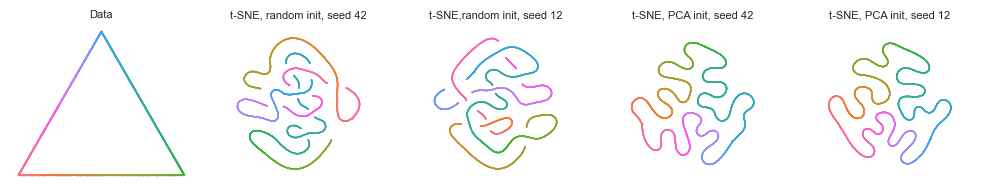

In [7]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(n))

titles = ['Data', 't-SNE, random init, seed 42', 't-SNE,random init, seed 12', 't-SNE, PCA init, seed 42', 't-SNE, PCA init, seed 12']

plt.figure(figsize=(10,2))

for i,Z in enumerate([X_trig, Z0_trig, Z1_trig, Z2_trig, Z3_trig],1):
    plt.subplot(1,5,i)
    plt.gca().set_aspect('equal', adjustable='datalim')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=np.arange(n), cmap=cmap, 
                edgecolor='none', rasterized=True)
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i-1], fontsize=8)
    
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()

## t-SNE on a square

In [8]:
# Define square vertices
v1 = np.array([0, 0])   # Bottom-left
v2 = np.array([1, 0])   # Bottom-right
v3 = np.array([1, 1])   # Top-right
v4 = np.array([0, 1])   # Top-left

# Parametric representation of the square perimeter
t = np.linspace(0, 1, n, endpoint=False)  # Parameter along the perimeter

# Determine which edge each point belongs to
edge = (t * 4).astype(int)  # 4 edges

# Interpolate along edges
X_square = np.zeros((n, 2))
X_square[edge == 0] = np.outer(t[edge == 0] * 4, v2 - v1) + v1  # Bottom edge
X_square[edge == 1] = np.outer((t[edge == 1] - 1/4) * 4, v3 - v2) + v2  # Right edge
X_square[edge == 2] = np.outer((t[edge == 2] - 2/4) * 4, v4 - v3) + v3  # Top edge
X_square[edge == 3] = np.outer((t[edge == 3] - 3/4) * 4, v1 - v4) + v4  # Left edge

# Add small Gaussian noise
X_square += np.random.randn(n, 2) / 1000


In [9]:
# BH is faster for this sample size
Z0_square = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(X_square)
Z1_square = TSNE(n_jobs=-1, initialization='random', random_state=12, negative_gradient_method='bh').fit(X_square)
Z2_square = TSNE(n_jobs=-1, random_state=42, negative_gradient_method='bh').fit(X_square)
Z3_square = TSNE(n_jobs=-1, random_state=12, negative_gradient_method='bh').fit(X_square)

In [1]:
titles = ['Data', 't-SNE, random init, seed 42', 't-SNE, random init, seed 12', 't-SNE, PCA init, seed 42', 't-SNE, PCA init, seed 12']

plt.figure(figsize=(10,2))

for i,Z in enumerate([X_square, Z0_square, Z1_square, Z2_square, Z3_square],1):
    plt.subplot(1,5,i)
    plt.gca().set_aspect('equal', adjustable='datalim')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=np.arange(n), cmap=cmap, 
                edgecolor='none', rasterized=True)
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i-1], fontsize=8)
    
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()

NameError: name 'plt' is not defined

## t-SNE on two three circles next to each other

In [12]:
# Generate the data
n = 2000
np.random.seed(42)
X = np.random.randn(n, 3) / 1000
spacing = 2 

# Generate first circle (centered at origin)
X[:, 0] += np.cos(np.arange(n) * 2 * np.pi / n)
X[:, 1] += np.sin(np.arange(n) * 2 * np.pi / n)

# Second circle: Shift to the right
X2 = X.copy()
X2[:, 0] += 2 * spacing # Move right

# Third circle: Shift up and centered between first two circles
X3 = X.copy()
X3[:, 0] += spacing  # Move slightly to the right
X3[:, 1] += np.sqrt(3) * spacing  # Move up to form an equilateral triangle

# Combine all circles
X_all = np.vstack([X, X2, X3])

In [10]:
%%time

# BH is faster for this sample size
Z1_all = TSNE(n_jobs=-1, n_iter=1000, initialization='random', random_state=42, negative_gradient_method='bh', verbose=True).fit(X_all)
Z2_all = TSNE(n_jobs=-1,n_iter=1000, negative_gradient_method='bh', verbose=True).fit(X_all)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, initialization='random', n_iter=1000, n_jobs=-1,
     negative_gradient_method='bh', random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 3.29 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.27 seconds
===> Running optimization with exaggeration=12.00, lr=500.00 for 250 iterations...
Iteration   50, KL divergence 3.4017, 50 iterations in 14.3486 sec
Iteration  100, KL divergence 2.6452, 50 iterations in 8.4343 sec
Iteration  150, KL divergence 2.2486, 50 iterations in 8.6094 sec
Iteration  200, KL divergence 2.0346, 50 iterations in 7.7111 sec
Iteration  250, KL divergence 1.8992, 50 iterations in 7.2922 sec
   --> Time elapsed: 46.40 seconds
===> Running optimization with exaggeration=1.00

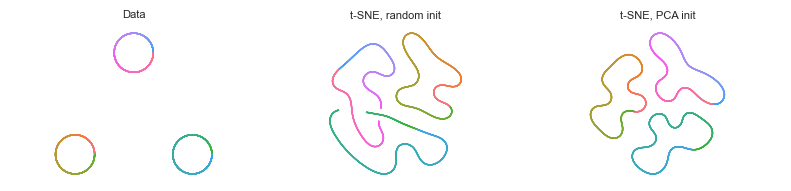

In [11]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(n))

titles = ['Data', 't-SNE, random init', 't-SNE, PCA init']

plt.figure(figsize=(8,2))

for i,Z in enumerate([X_all,Z1_all,Z2_all],1):
    plt.subplot(1,3,i)
    plt.gca().set_aspect('equal', adjustable='datalim')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=np.arange(6000), cmap=cmap, 
                edgecolor='none', rasterized=True)
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i-1], fontsize=8)
    
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()

## t-SNE with spectral clustering initialization

In [14]:
%%time

# BH is faster for this sample size
Z3_spectral = TSNE(n_jobs=-1,n_iter=1000, negative_gradient_method='bh', verbose=True).fit(X_all, initialization="spectral")
Z1_rand = TSNE(n_jobs=-1, n_iter=1000, initialization='random', random_state=42, negative_gradient_method='bh', verbose=True).fit(X_all)
Z2_pca = TSNE(n_jobs=-1,n_iter=1000, negative_gradient_method='bh', verbose=True).fit(X_all)


--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_iter=1000, n_jobs=-1,
     negative_gradient_method='bh', verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...


   --> Time elapsed: 3.20 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.30 seconds
===> Calculating spectral initialization...
   --> Time elapsed: 0.27 seconds
===> Running optimization with exaggeration=12.00, lr=500.00 for 250 iterations...
Iteration   50, KL divergence 2.6026, 50 iterations in 17.9823 sec
Iteration  100, KL divergence 2.4235, 50 iterations in 16.1724 sec
Iteration  150, KL divergence 2.2443, 50 iterations in 17.4655 sec
Iteration  200, KL divergence 2.1568, 50 iterations in 14.8094 sec
Iteration  250, KL divergence 2.1073, 50 iterations in 10.4321 sec
   --> Time elapsed: 76.87 seconds
===> Running optimization with exaggeration=1.00, lr=6000.00 for 1000 iterations...
Iteration   50, KL divergence 0.7200, 50 iterations in 18.1427 sec
Iteration  100, KL divergence 0.5262, 50 iterations in 10.9107 sec
Iteration  150, KL divergence 0.4555, 50 iterations in 11.8572 sec
Iteration  200, KL divergence 0.4191, 50 iterations in 10.0146 sec
Iteration  25

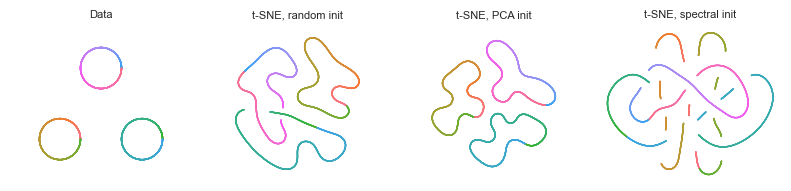

In [16]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(n))

titles = ['Data', 't-SNE, random init', 't-SNE, PCA init', 't-SNE, spectral init']

plt.figure(figsize=(8,2))

for i,Z in enumerate([X_all,Z1_rand,Z2_pca, Z3_spectral],1):
    plt.subplot(1,4,i)
    plt.gca().set_aspect('equal', adjustable='datalim')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=np.arange(6000), cmap=cmap, 
                edgecolor='none', rasterized=True)
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i-1], fontsize=8)
    
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()

### when do we get these weird lines?

In [17]:
# Generate the data with fewer points
n = 700
np.random.seed(42)
X = np.random.randn(n,3) / 1000
X[:,0] += np.cos(np.arange(n)*2*np.pi/n)
X[:,1] += np.sin(np.arange(n)*2*np.pi/n)

In [33]:
%%time

# BH is faster for this sample size
Z1 = TSNE(perplexity=10, n_jobs=-1, n_iter=50, random_state=42, verbose=True).fit(X)
Z2 = TSNE(perplexity=40, n_jobs=-1,n_iter=50, verbose=True).fit(X)
Z3 = TSNE(perplexity=60, n_jobs=-1,n_iter=50, verbose=True).fit(X)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_iter=50, n_jobs=-1, perplexity=10,
     random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 30 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.06 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.04 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=58.33 for 250 iterations...
Iteration   50, KL divergence 2.0520, 50 iterations in 1.3467 sec
Iteration  100, KL divergence 1.8535, 50 iterations in 1.7503 sec
Iteration  150, KL divergence 1.6655, 50 iterations in 0.8227 sec
Iteration  200, KL divergence 1.5708, 50 iterations in 0.6660 sec
Iteration  250, KL divergence 1.5163, 50 iterations in 0.6623 sec
   --> Time elapsed: 5.25 seconds
===> Running optimization w

In [30]:
Z4 = TSNE(perplexity=100, n_jobs=-1,n_iter=50, verbose=True).fit(X)
Z5 = TSNE(perplexity=200, n_jobs=-1,n_iter=50, verbose=True).fit(X)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_iter=50, n_jobs=-1, perplexity=100, verbose=True)
--------------------------------------------------------------------------------
===> Finding 300 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.08 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.21 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=58.33 for 250 iterations...
Iteration   50, KL divergence 1.3572, 50 iterations in 1.3716 sec
Iteration  100, KL divergence 1.3013, 50 iterations in 1.8786 sec
Iteration  150, KL divergence 1.3016, 50 iterations in 0.9441 sec
Iteration  200, KL divergence 1.3016, 50 iterations in 0.8481 sec
Iteration  250, KL divergence 1.3016, 50 iterations in 1.8720 sec
   --> Time elapsed: 6.92 seconds
===> Running optimization with exaggeration=1.0

In [32]:
Z6 = TSNE(perplexity=300, n_jobs=-1,n_iter=50, verbose=True).fit(X)

Perplexity value 300 is too high. Using perplexity 233.00 instead


--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_iter=50, n_jobs=-1, perplexity=300, verbose=True)
--------------------------------------------------------------------------------
===> Finding 699 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.14 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.29 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=58.33 for 250 iterations...
Iteration   50, KL divergence 0.0090, 50 iterations in 1.2068 sec
Iteration  100, KL divergence 1.1000, 50 iterations in 0.7663 sec
Iteration  150, KL divergence 1.1000, 50 iterations in 0.5443 sec
Iteration  200, KL divergence 1.1000, 50 iterations in 0.5200 sec
Iteration  250, KL divergence 1.1000, 50 iterations in 0.7514 sec
   --> Time elapsed: 3.80 seconds
===> Running optimization with exaggeration=1.0

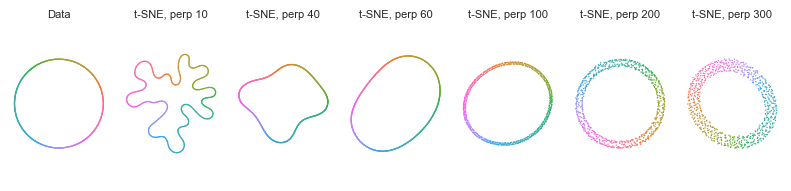

In [34]:
cmap = ListedColormap(sns.husl_palette(n))

titles = ['Data', 't-SNE, perp 10', 't-SNE, perp 40', 't-SNE, perp 60', 't-SNE, perp 100', 't-SNE, perp 200', 't-SNE, perp 300']

plt.figure(figsize=(8,2))

for i,Z in enumerate([X,Z1,Z2,Z3,Z4,Z5,Z6],1):
    plt.subplot(1,7,i)
    plt.gca().set_aspect('equal', adjustable='datalim')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=np.arange(n), cmap=cmap, 
                edgecolor='none', rasterized=True)
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i-1], fontsize=8)
    
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.show()